In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import time
from matplotlib import cm
import seaborn as sns
from netCDF4 import Dataset
import plotly.express as px

In [7]:
df = pd.read_csv(r'C:\Mew\Project\tmp_2012-2016\meantmp_2012_2015_d.csv', index_col=-1, parse_dates=True)
df

year  month  day  300201  300202  303201  303301  310201  327202  \
date                                                                           
2012-01-01  2012      1    1    23.9    23.6    22.5    22.3    22.5    17.7   
2012-01-02  2012      1    2    23.9    24.7    22.9    22.6    23.5    18.5   
2012-01-03  2012      1    3    24.0    24.0    23.0    22.4    25.5    18.3   
2012-01-04  2012      1    4    23.9    24.2    23.0    22.8    24.4    17.5   
2012-01-05  2012      1    5    23.4    23.7    23.0    22.2    25.3    17.9   
...          ...    ...  ...     ...     ...     ...     ...     ...     ...   
2015-12-27  2015     12   27    22.4    23.3    23.8    23.6    24.7    18.5   
2015-12-28  2015     12   28    23.3    23.3    24.5    23.3    24.8    18.6   
2015-12-29  2015     12   29    22.9    23.0    24.9    23.7    25.2    17.7   
2015-12-30  2015     12   30    22.6    22.4    24.1    22.7    24.2    16.7   
2015-12-31  2015     12   31    23.7    23.8    23.5    22.7    22.6    16.0   

            327501  ...  566202  567201  568301  568401  568501  568502  \
date                ...                                                   
2012-01-01    24.7  ...    24.5    23.5    23.7    24.2    24.1    23.6   
2012-01-02    25.0  ...    25.4    25.7    26.4    27.0    26.5    26.4   
2012-01-03    25.8  ...    26.0    26.4    27.1    27.1    27.0    26.7   
2012-01-04    26.0  ...    27.1    27.1    26.7    27.0    27.2    26.5   
2012-01-05    25.6  ...    26.3    27.2    26.9    27.1    27.2    26.2   
...            ...  ...     ...     ...     ...     ...     ...     ...   
2015-12-27    26.2  ...    27.5    28.0    28.0    27.7    28.5    27.6   
2015-12-28    27.0  ...    27.3    28.5    28.0    28.0    28.5    27.8   
2015-12-29    26.3  ...    26.9    28.6    27.8    27.8    28.7    27.6   
2015-12-30    25.5  ...    26.4    27.3    27.6    27.2    28.6    26.7   
2015-12-31    25.1  ...    26.3    26.6    27.4    26.8    28.0    25.8   

            570201  580201  581301  583201  
date                                        
2012-01-01    24.3    23.4    23.6    24.3  
2012-01-02    27.3    27.2    26.7    25.4  
2012-01-03    27.9    26.6    26.1    25.4  
2012-01-04    27.8    26.6    26.1    25.7  
2012-01-05    28.0    26.3    25.9    25.9  
...            ...     ...     ...     ...  
2015-12-27    29.1    26.9    26.5    26.8  
2015-12-28    28.4    27.0    26.7    28.0  
2015-12-29    29.1    27.5    26.9    28.2  
2015-12-30    28.8    26.9    26.2    27.8  
2015-12-31    28.2    25.1    24.2    25.7  

[1461 rows x 125 columns]

In [ ]:
new_df = df.loc[df['']]

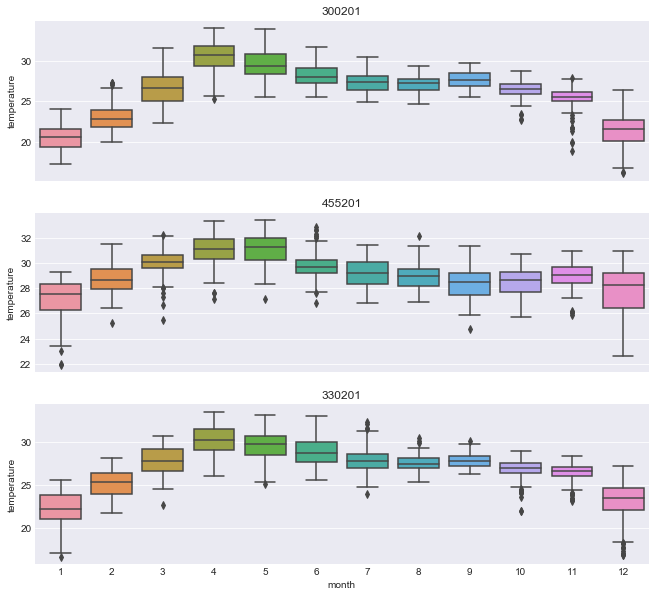

In [33]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['300201', '455201', '330201'], axes):
    sns.boxplot(data=df, x='month', y=name, ax=ax).set_title("LaLaLa")
    ax.set_ylabel('temperature')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

### mean of week

In [34]:
data_columns = ['300201', '451301', '568502']
# Resample to weekly frequency, aggregating with mean
tmp_weekly_mean = df[data_columns].resample('W').mean()
tmp_weekly_mean

300201     451301     568502
date                                       
2012-01-01  23.900000  25.800000  23.600000
2012-01-08  22.685714  26.328571  26.142857
2012-01-15  21.828571  24.714286  24.914286
2012-01-22  18.571429  27.728571  26.157143
2012-01-29  18.928571  27.800000  26.342857
...               ...        ...        ...
2015-12-06  22.200000  27.542857  27.242857
2015-12-13  21.600000  26.728571  27.657143
2015-12-20  22.700000  25.242857  26.385714
2015-12-27  21.528571  26.228571  26.871429
2016-01-03  23.125000  26.250000  26.975000

[210 rows x 3 columns]

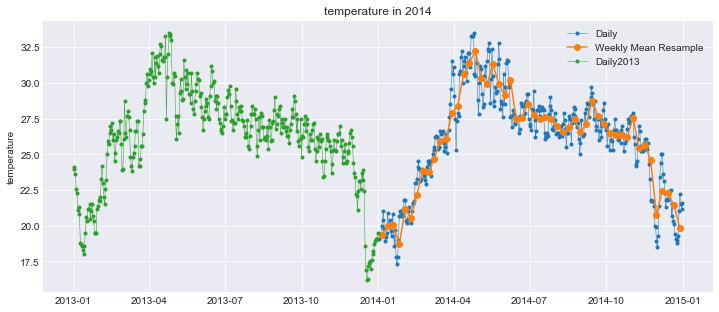

In [35]:
start, end = '2014-01', '2014-12'
start1, end1 = '2013-01', '2013-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df.loc[start:end, '300201'],
    marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(tmp_weekly_mean.loc[start:end, '300201'],
    marker='o', markersize=6, linestyle='-', label='Weekly Mean Resample')
ax.plot(df.loc[start1:end1, '300201'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily2013')
ax.set_ylabel('temperature')
ax.set_title('temperature in 2014')
ax.legend();

In [36]:
tmp_monthly = df[data_columns].resample('M').sum(min_count=28)
tmp_monthly.head(3)

300201  451301  568502
date                              
2012-01-31   641.8   823.1   801.2
2012-02-29   659.8   813.0   777.2
2012-03-31   807.9   914.3   853.4

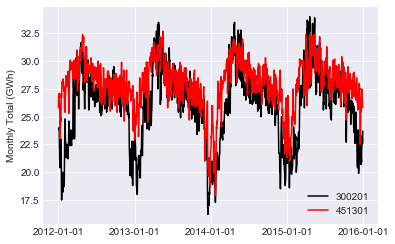

In [37]:
fig, ax = plt.subplots()
ax.plot(df['300201'], color='black', label='300201')
ax.plot(df['451301'], color='red', label='451301')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

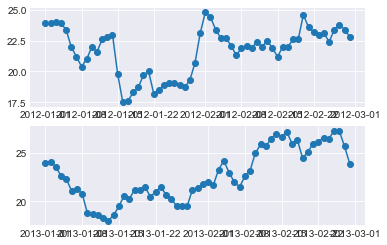

In [38]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(2,1)
ax[0].plot(df.loc['2012-01':'2012-02', '300201'], marker='o', linestyle='-')
ax[1].plot(df.loc['2013-01':'2013-02', '300201'], marker='o', linestyle='-')
# ax.set_ylabel('Daily Consumption (GWh)')
# ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

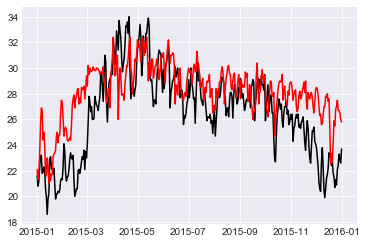

In [39]:
start, end = '2015-01-01', '2015-12'
fig, ax = plt.subplots()
ax.plot(df.loc[start:end,'300201'], color='black', label='300201')
ax.plot(df.loc[start:end,'451301'], color='red', label='451301')

Text(0, 0.5, 'Score')

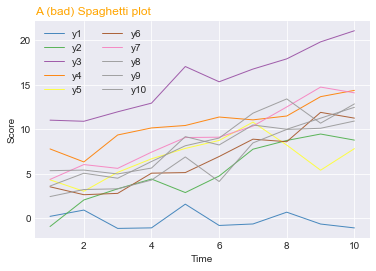

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14), 'y10': np.random.randn(10)+range(2,12) })
 
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")


In [16]:
df.drop(['x','y1'], axis=1)

y2         y3         y4         y5         y6         y7         y8  \
0 -0.911126  11.016724   7.789505   4.324538   3.543457   4.371896   5.351681   
1  2.068611  10.891757   6.332563   3.041502   2.657028   6.037022   5.418808   
2  3.315576  11.953484   9.355490   5.168183   2.806416   5.613576   4.984612   
3  4.412326  12.925746  10.145825   6.680041   5.071985   7.428787   5.646653   
4  2.898476  17.031781  10.419682   7.848123   5.138096   9.069498   9.171759   
5  4.748287  15.321707  11.367788   8.742785   6.940150   9.105779   8.234648   
6  7.760742  16.746895  11.051642  10.794472   8.884566  10.349353  10.473545   
7  8.740823  17.891725  11.481498   8.221540   8.600419  12.499139   9.996893   
8  9.460685  19.796621  13.651632   5.405547  11.890774  14.725514  11.239963   
9  8.780005  21.043482  14.358417   7.823158  11.244103  14.080081  12.457292   

          y9        y10  
0   3.632479   2.448590  
1   5.065702   3.240076  
2   4.505519   3.317691  
3   6.381935   4.297515  
4   8.145949   6.890372  
5   9.010798   4.134404  
6  11.800616   8.466676  
7  13.399250   9.976209  
8  10.677180  10.106369  
9  12.839005  10.918552

Text(0, 0.5, 'Score')

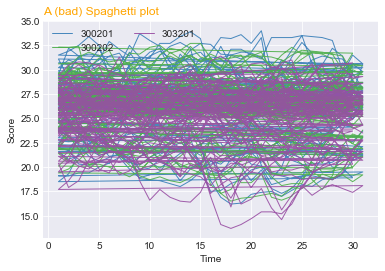

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
#df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14), 'y10': np.random.randn(10)+range(2,12) })
 
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df1.drop(['year','month','day'], axis=1):
    num+=1
    plt.plot(df1['day'], df1[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")


In [20]:
df[column][0:12]

0     24.3
1     25.4
2     25.4
3     25.7
4     25.9
5     26.5
6     25.9
7     25.0
8     25.6
9     25.8
10    26.2
11    25.9
Name: 583201, dtype: float64

In [23]:
a = df.loc[df['year'] == 2012]
a

year  month  day  300201  300202  303201  303301  310201  327202  327501  \
0    2012      1    1    23.9    23.6    22.5    22.3    22.5    17.7    24.7   
1    2012      1    2    23.9    24.7    22.9    22.6    23.5    18.5    25.0   
2    2012      1    3    24.0    24.0    23.0    22.4    25.5    18.3    25.8   
3    2012      1    4    23.9    24.2    23.0    22.8    24.4    17.5    26.0   
4    2012      1    5    23.4    23.7    23.0    22.2    25.3    17.9    25.6   
..    ...    ...  ...     ...     ...     ...     ...     ...     ...     ...   
361  2012     12   27    22.0    23.0    21.3    20.9    21.6    16.4    24.0   
362  2012     12   28    21.3    22.2    22.0    21.5    21.9    17.4    24.3   
363  2012     12   29    21.1    22.0    21.6    21.3    21.9    17.8    23.8   
364  2012     12   30    21.4    21.9    21.8    21.3    22.1    17.1    24.1   
365  2012     12   31    22.1    23.1    22.7    22.3    23.3    18.5    24.8   

     ...  567201  568301  568401  568501  568502  570201  580201  581301  \
0    ...    23.5    23.7    24.2    24.1    23.6    24.3    23.4    23.6   
1    ...    25.7    26.4    27.0    26.5    26.4    27.3    27.2    26.7   
2    ...    26.4    27.1    27.1    27.0    26.7    27.9    26.6    26.1   
3    ...    27.1    26.7    27.0    27.2    26.5    27.8    26.6    26.1   
4    ...    27.2    26.9    27.1    27.2    26.2    28.0    26.3    25.9   
..   ...     ...     ...     ...     ...     ...     ...     ...     ...   
361  ...    27.5    27.7    27.1    27.9    26.9    28.6    26.8    26.5   
362  ...    27.7    27.2    26.9    27.6    26.6    28.7    27.4    27.0   
363  ...    28.3    27.1    27.0    27.5    26.9    28.2    27.5    26.8   
364  ...    26.1    26.5    25.6    27.3    26.3    27.4    26.6    26.4   
365  ...    26.1    25.1    25.6    25.3    24.7    26.2    24.7    23.9   

     583201        date  
0      24.3  2012-01-01  
1      25.4  2012-01-02  
2      25.4  2012-01-03  
3      25.7  2012-01-04  
4      25.9  2012-01-05  
..      ...         ...  
361    26.5  2012-12-27  
362    26.8  2012-12-28  
363    26.9  2012-12-29  
364    26.9  2012-12-30  
365    24.0  2012-12-31  

[366 rows x 126 columns]

In [41]:
data_columns = ['300201', '451301', '568502']
# Resample to weekly frequency, aggregating with mean
tmp_weekly_mean = df[data_columns].resample('W').mean()
tmp_weekly_mean

300201     451301     568502
date                                       
2012-01-01  23.900000  25.800000  23.600000
2012-01-08  22.685714  26.328571  26.142857
2012-01-15  21.828571  24.714286  24.914286
2012-01-22  18.571429  27.728571  26.157143
2012-01-29  18.928571  27.800000  26.342857
2012-02-05  23.114286  26.414286  26.214286
2012-02-12  21.957143  28.257143  26.328571
2012-02-19  22.114286  28.114286  26.657143
2012-02-26  23.328571  27.985714  27.514286
2012-03-04  22.914286  29.628571  27.157143

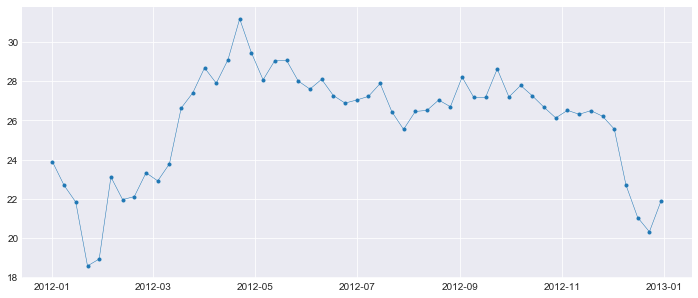

In [45]:
start, end = '2012-01', '2012-12'
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(tmp_weekly_mean.loc[start:end, '300201'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

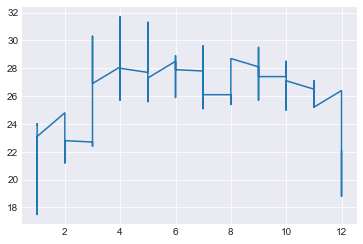

In [24]:
plt.plot(df['month'][0:366],df['300201'][0:366])

In [8]:
df1 = pd.read_csv(r'C:\Mew\Project\tmp_2012-2016\meantmp_2012_2015_d.csv', index_col=-1, parse_dates=True)
df1

year  month  day  300201  300202  303201  303301  310201  327202  \
date                                                                           
2012-01-01  2012      1    1    23.9    23.6    22.5    22.3    22.5    17.7   
2012-01-02  2012      1    2    23.9    24.7    22.9    22.6    23.5    18.5   
2012-01-03  2012      1    3    24.0    24.0    23.0    22.4    25.5    18.3   
2012-01-04  2012      1    4    23.9    24.2    23.0    22.8    24.4    17.5   
2012-01-05  2012      1    5    23.4    23.7    23.0    22.2    25.3    17.9   
...          ...    ...  ...     ...     ...     ...     ...     ...     ...   
2015-12-27  2015     12   27    22.4    23.3    23.8    23.6    24.7    18.5   
2015-12-28  2015     12   28    23.3    23.3    24.5    23.3    24.8    18.6   
2015-12-29  2015     12   29    22.9    23.0    24.9    23.7    25.2    17.7   
2015-12-30  2015     12   30    22.6    22.4    24.1    22.7    24.2    16.7   
2015-12-31  2015     12   31    23.7    23.8    23.5    22.7    22.6    16.0   

            327501  ...  566202  567201  568301  568401  568501  568502  \
date                ...                                                   
2012-01-01    24.7  ...    24.5    23.5    23.7    24.2    24.1    23.6   
2012-01-02    25.0  ...    25.4    25.7    26.4    27.0    26.5    26.4   
2012-01-03    25.8  ...    26.0    26.4    27.1    27.1    27.0    26.7   
2012-01-04    26.0  ...    27.1    27.1    26.7    27.0    27.2    26.5   
2012-01-05    25.6  ...    26.3    27.2    26.9    27.1    27.2    26.2   
...            ...  ...     ...     ...     ...     ...     ...     ...   
2015-12-27    26.2  ...    27.5    28.0    28.0    27.7    28.5    27.6   
2015-12-28    27.0  ...    27.3    28.5    28.0    28.0    28.5    27.8   
2015-12-29    26.3  ...    26.9    28.6    27.8    27.8    28.7    27.6   
2015-12-30    25.5  ...    26.4    27.3    27.6    27.2    28.6    26.7   
2015-12-31    25.1  ...    26.3    26.6    27.4    26.8    28.0    25.8   

            570201  580201  581301  583201  
date                                        
2012-01-01    24.3    23.4    23.6    24.3  
2012-01-02    27.3    27.2    26.7    25.4  
2012-01-03    27.9    26.6    26.1    25.4  
2012-01-04    27.8    26.6    26.1    25.7  
2012-01-05    28.0    26.3    25.9    25.9  
...            ...     ...     ...     ...  
2015-12-27    29.1    26.9    26.5    26.8  
2015-12-28    28.4    27.0    26.7    28.0  
2015-12-29    29.1    27.5    26.9    28.2  
2015-12-30    28.8    26.9    26.2    27.8  
2015-12-31    28.2    25.1    24.2    25.7  

[1461 rows x 125 columns]

In [9]:
df1 = df1.iloc[:, 0:4]
df1

year  month  day  300201
date                                
2012-01-01  2012      1    1    23.9
2012-01-02  2012      1    2    23.9
2012-01-03  2012      1    3    24.0
2012-01-04  2012      1    4    23.9
2012-01-05  2012      1    5    23.4
...          ...    ...  ...     ...
2015-12-27  2015     12   27    22.4
2015-12-28  2015     12   28    23.3
2015-12-29  2015     12   29    22.9
2015-12-30  2015     12   30    22.6
2015-12-31  2015     12   31    23.7

[1461 rows x 4 columns]

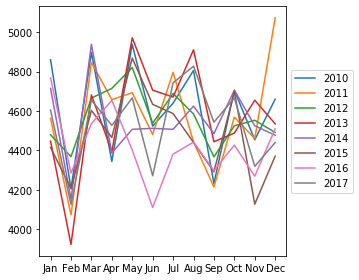

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

# dummy data (Days)
dates_d = pd.date_range('2010-01-01', '2017-12-31', freq='D')
df_year = pd.DataFrame(np.random.randint(100, 200, (dates_d.shape[0], 1)), columns=['Data'])
df_year.index = dates_d #set index

pt = pd.pivot_table(df_year, index=df_year.index.month, columns=df_year.index.year, aggfunc='sum')
pt.columns = pt.columns.droplevel() # remove the double header (0) as pivot creates a multiindex.

ax = plt.figure().add_subplot(111)
ax.plot(pt)

ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels) #add monthlabels to the xaxis

ax.legend(pt.columns.tolist(), loc='center left', bbox_to_anchor=(1, .5)) #add the column names as legend.
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [11]:
df_year

Data
2010-01-01   150
2010-01-02   122
2010-01-03   184
2010-01-04   144
2010-01-05   113
...          ...
2017-12-27   160
2017-12-28   114
2017-12-29   143
2017-12-30   187
2017-12-31   182

[2922 rows x 1 columns]

In [12]:
pt

2010  2011  2012  2013  2014  2015  2016  2017
1   4861  4563  4479  4447  4715  4415  4768  4605
2   4205  4072  4368  3922  4152  4207  4285  4125
3   4898  4847  4666  4682  4939  4603  4536  4656
4   4344  4658  4715  4393  4387  4466  4654  4527
5   4939  4693  4821  4972  4507  4869  4402  4667
6   4523  4481  4538  4706  4512  4634  4110  4271
7   4640  4797  4689  4671  4507  4587  4381  4743
8   4806  4443  4585  4911  4625  4441  4442  4828
9   4232  4214  4367  4444  4485  4291  4297  4543
10  4705  4569  4525  4488  4706  4699  4427  4667
11  4454  4460  4553  4655  4525  4127  4269  4319
12  4660  5074  4491  4535  4477  4371  4510  4440

In [13]:
df1.iloc[df1.index.month == 1]

year  month  day  300201
date                                
2012-01-01  2012      1    1    23.9
2012-01-02  2012      1    2    23.9
2012-01-03  2012      1    3    24.0
2012-01-04  2012      1    4    23.9
2012-01-05  2012      1    5    23.4
...          ...    ...  ...     ...
2015-01-27  2015      1   27    20.3
2015-01-28  2015      1   28    20.5
2015-01-29  2015      1   29    21.2
2015-01-30  2015      1   30    21.4
2015-01-31  2015      1   31    21.3

[124 rows x 4 columns]

NameError: name 'pt1' is not defined

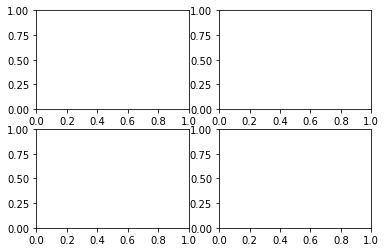

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(pt1.iloc[:, 0:4])
ax[0,1].plot(pt.iloc[:, 4:8])
ax[1,0].plot(pt.iloc[:, 8:12])
ax[1,1].plot(pt.iloc[:, 12:16])
#ax = plt.figure().add_subplot(111)
#ax.plot(pt1)

ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels) #add monthlabels to the xaxis

ax.legend(pt.columns.tolist(), loc='center left', bbox_to_anchor=(1, .5)) #add the column names as legend.
#plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.title("300201")

plt.show()

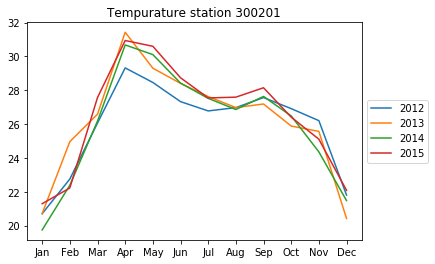

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

# fig, ax = plt.subplots(2, 2)
# ax[0, 0].plot(pt1.iloc[:, 0:4])
# ax[0,1].plot(pt.iloc[:, 4:8])
# ax[1,0].plot(pt.iloc[:, 8:12])
# ax[1,1].plot(pt.iloc[:, 12:16])
ax = plt.figure().add_subplot(111)
ax.plot(pt.iloc[:,0:4])

ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels) #add monthlabels to the xaxis

ax.legend(pt.columns.tolist(), loc='center left', bbox_to_anchor=(1, .5)) #add the column names as legend.
#plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.title("Tempurature station 300201")

plt.show()

In [16]:
new_df = df.iloc[:, 0:7]
new_df

year  month  day  300201  300202  303201  303301
date                                                        
2012-01-01  2012      1    1    23.9    23.6    22.5    22.3
2012-01-02  2012      1    2    23.9    24.7    22.9    22.6
2012-01-03  2012      1    3    24.0    24.0    23.0    22.4
2012-01-04  2012      1    4    23.9    24.2    23.0    22.8
2012-01-05  2012      1    5    23.4    23.7    23.0    22.2
...          ...    ...  ...     ...     ...     ...     ...
2015-12-27  2015     12   27    22.4    23.3    23.8    23.6
2015-12-28  2015     12   28    23.3    23.3    24.5    23.3
2015-12-29  2015     12   29    22.9    23.0    24.9    23.7
2015-12-30  2015     12   30    22.6    22.4    24.1    22.7
2015-12-31  2015     12   31    23.7    23.8    23.5    22.7

[1461 rows x 7 columns]

In [17]:
pt = pd.pivot_table(new_df, index=new_df.index.month, columns=new_df.index.year, aggfunc='mean')
pt.columns = pt.columns.droplevel() # remove the double header (0) as pivot creates a multiindex.

In [18]:
pt

date       2012       2013       2014       2015       2012       2013  \
date                                                                     
1     20.703226  20.709677  19.745161  21.293548  21.374194  20.990323   
2     22.751724  24.964286  22.385714  22.225000  22.710345  25.321429   
3     26.061290  26.583871  26.177419  27.567742  26.451613  26.619355   
4     29.320000  31.426667  30.676667  30.936667  29.863333  30.976667   
5     28.458065  29.303226  30.106452  30.596774  28.522581  29.693548   
6     27.326667  28.403333  28.423333  28.736667  26.656667  27.556667   
7     26.777419  27.625806  27.519355  27.545161  26.267742  26.632258   
8     26.970968  26.974194  26.861290  27.590323  26.000000  26.225806   
9     27.566667  27.186667  27.633333  28.146667  27.280000  26.883333   
10    26.912903  25.883871  26.480645  26.409677  26.787097  26.096774   
11    26.203333  25.566667  24.356667  25.106667  26.356667  25.923333   
12    21.806452  20.422581  21.477419  22.083871  22.945161  20.538710   

date       2014       2015       2012       2013  ...  2014  2015  2012  2013  \
date                                              ...                           
1     19.738710  21.035484  20.580645  21.112903  ...  16.0  16.0     1     1   
2     21.875000  21.721429  22.762069  24.125000  ...  14.5  14.5     2     2   
3     25.722581  26.974194  24.606452  24.258065  ...  16.0  16.0     3     3   
4     30.260000  29.533333  27.536667  28.450000  ...  15.5  15.5     4     4   
5     29.635484  29.938710  27.348387  28.167742  ...  16.0  16.0     5     5   
6     27.316667  27.800000  27.640000  27.633333  ...  15.5  15.5     6     6   
7     26.612903  26.464516  26.454839  26.835484  ...  16.0  16.0     7     7   
8     26.490323  26.764516  26.967742  26.693548  ...  16.0  16.0     8     8   
9     27.200000  27.446667  26.503333  26.336667  ...  15.5  15.5     9     9   
10    26.148387  26.438710  25.880645  24.509677  ...  16.0  16.0    10    10   
11    24.793333  25.813333  25.233333  24.030000  ...  15.5  15.5    11    11   
12    22.219355  22.629032  22.064516  18.480645  ...  16.0  16.0    12    12   

date  2014  2015  2012  2013  2014  2015  
date                                      
1        1     1  2012  2013  2014  2015  
2        2     2  2012  2013  2014  2015  
3        3     3  2012  2013  2014  2015  
4        4     4  2012  2013  2014  2015  
5        5     5  2012  2013  2014  2015  
6        6     6  2012  2013  2014  2015  
7        7     7  2012  2013  2014  2015  
8        8     8  2012  2013  2014  2015  
9        9     9  2012  2013  2014  2015  
10      10    10  2012  2013  2014  2015  
11      11    11  2012  2013  2014  2015  
12      12    12  2012  2013  2014  2015  

[12 rows x 28 columns]

In [19]:
pt1 = pt.loc[:,~pt.columns.duplicated()]

In [20]:
pt.iloc[:, 8:12]

date       2012       2013       2014       2015
date                                            
1     20.580645  21.112903  19.274194  19.641935
2     22.762069  24.125000  22.017857  21.735714
3     24.606452  24.258065  24.619355  25.064516
4     27.536667  28.450000  27.276667  26.430000
5     27.348387  28.167742  27.925806  28.548387
6     27.640000  27.633333  28.006667  28.680000
7     26.454839  26.835484  26.958065  27.690323
8     26.967742  26.693548  26.548387  27.203226
9     26.503333  26.336667  26.816667  27.246667
10    25.880645  24.509677  25.841935  25.574194
11    25.233333  24.030000  24.076667  24.580000
12    22.064516  18.480645  20.896774  21.722581

## tem lat lon

In [25]:
df = pd.read_csv(r'C:\Mew\Project\tmp_2012-2016\tmean_2012-2015_d.csv')
df

year  month  day  300201  300202  303201  303301  310201  327202  \
0     2012      1    1    23.9    23.6    22.5    22.3    22.5    17.7   
1     2012      1    2    23.9    24.7    22.9    22.6    23.5    18.5   
2     2012      1    3    24.0    24.0    23.0    22.4    25.5    18.3   
3     2012      1    4    23.9    24.2    23.0    22.8    24.4    17.5   
4     2012      1    5    23.4    23.7    23.0    22.2    25.3    17.9   
...    ...    ...  ...     ...     ...     ...     ...     ...     ...   
1456  2015     12   27    22.4    23.3    23.8    23.6    24.7    18.5   
1457  2015     12   28    23.3    23.3    24.5    23.3    24.8    18.6   
1458  2015     12   29    22.9    23.0    24.9    23.7    25.2    17.7   
1459  2015     12   30    22.6    22.4    24.1    22.7    24.2    16.7   
1460  2015     12   31    23.7    23.8    23.5    22.7    22.6    16.0   

      327301  ...  567201  568301  568401  568501  568502  570201  580201  \
0        NaN  ...    23.5    23.7    24.2    24.1    23.6    24.3    23.4   
1        NaN  ...    25.7    26.4    27.0    26.5    26.4    27.3    27.2   
2        NaN  ...    26.4    27.1    27.1    27.0    26.7    27.9    26.6   
3        NaN  ...    27.1    26.7    27.0    27.2    26.5    27.8    26.6   
4        NaN  ...    27.2    26.9    27.1    27.2    26.2    28.0    26.3   
...      ...  ...     ...     ...     ...     ...     ...     ...     ...   
1456     NaN  ...    28.0    28.0    27.7    28.5    27.6    29.1    26.9   
1457     NaN  ...    28.5    28.0    28.0    28.5    27.8    28.4    27.0   
1458     NaN  ...    28.6    27.8    27.8    28.7    27.6    29.1    27.5   
1459     NaN  ...    27.3    27.6    27.2    28.6    26.7    28.8    26.9   
1460     NaN  ...    26.6    27.4    26.8    28.0    25.8    28.2    25.1   

      581301  583201        date  
0       23.6    24.3  2012-01-01  
1       26.7    25.4  2012-01-02  
2       26.1    25.4  2012-01-03  
3       26.1    25.7  2012-01-04  
4       25.9    25.9  2012-01-05  
...      ...     ...         ...  
1456    26.5    26.8  2015-12-27  
1457    26.7    28.0  2015-12-28  
1458    26.9    28.2  2015-12-29  
1459    26.2    27.8  2015-12-30  
1460    24.2    25.7  2015-12-31  

[1461 rows x 126 columns]

In [29]:
st = pd.read_csv(r'C:\Mew\Project\station_input.csv')
st

code        lat         lon
0    300201  19.300000   97.833333
1    300202  18.166667   97.933333
2    303201  19.961389   99.881389
3    303301  19.870833   99.782778
4    310201  19.133333   99.900000
..      ...        ...         ...
117  568502   6.916667  100.433333
118  570201   6.650000  100.083333
119  580201   6.783333  101.150000
120  581301   6.516667  101.283333
121  583201   6.416667  101.816667

[122 rows x 3 columns]

In [35]:
st['tmp_avr'] = ""

In [30]:
col = df.columns[3:-1]
col

Index(['300201', '300202', '303201', '303301', '310201', '327202', '327301',
       '327501', '328201', '328202',
       ...
       '566202', '567201', '568301', '568401', '568501', '568502', '570201',
       '580201', '581301', '583201'],
      dtype='object', length=122)

In [36]:
for i in range(len(col)):
    st['tmp_avr'][i] = df.loc[df['year'] == 2015, col[i]].mean()
st

C:\Users\Mewkkn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


code        lat         lon  tmp_avr
0    300201  19.300000   97.833333  26.5364
1    300202  18.166667   97.933333  26.0647
2    303201  19.961389   99.881389  25.3575
3    303301  19.870833   99.782778  24.7967
4    310201  19.133333   99.900000  25.8608
..      ...        ...         ...      ...
117  568502   6.916667  100.433333  27.2088
118  570201   6.650000  100.083333  28.0195
119  580201   6.783333  101.150000  27.5436
120  581301   6.516667  101.283333  27.2562
121  583201   6.416667  101.816667  27.5542

[122 rows x 4 columns]

In [37]:
st.to_csv(r'C:\Mew\Project\tmp_2012-2016\tmean_station_2015.csv', index=None)